# Intro to Data Manipulation and Visualization in Julia
In this section, we will learn and practice how to read in data, conduct data manipulation and visualization in Julia. This is an important step in solving a real-world optimization problem, as you typically need to:
* Read in data,
* Visualize and detect pattern and outliers in data, and
* Change data into a form ready for the optimization program


before running optimization.

## DataFrames
Like data frames in `R`, `Julia` also has a similar structure for datasets. You will need to load the package `DataFrames` first:

In [1]:
using DataFrames

Now let's read in a csv file for the dataset _iris_ using the `readtable` function. The csv file should sit in the same directory as the your script. Otherwise, you will need to change the path to the file for the first argument to the `readtable` function.

In [2]:
iris = readtable("iris.csv");

In [ ]:
### If you are unable to read the data, you can uncomment the following codes and run it:
# using RDatasets
# iris = dataset("datasets", "iris")

To view the first few rows of the data, you can use `head()`, or index the dataframe similar to what you did you in `R`:

To subset rows, pass in the indices in the first dimension. If you are not subsetting to particular columns, just pass in ``:`` in the second dimension (as opposed to leaving it blank in `R`).

In [3]:
iris[1:5,:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


To index a column using column name, simply put a `:` in front of the name. You do not need the `:` and the `,` when you are indexing an entire column.

In [4]:
iris[:SepalLength]

150-element DataArrays.DataArray{Float64,1}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4
 4.6
 5.0
 4.4
 4.9
 5.4
 4.8
 4.8
 ⋮  
 6.0
 6.9
 6.7
 6.9
 5.8
 6.8
 6.7
 6.7
 6.3
 6.5
 6.2
 5.9

We often times need to join/merge datasets. Let's look at an example first: suppose we have a dataframe that gives the species and the respective price at a flower shop:

In [5]:
species_price = DataFrame(Species = ["setosa", "versicolor", "virginica"],
                        Price = [2.5, 3.1, 3.2])

,Species,Price
1,setosa,2.5
2,versicolor,3.1
3,virginica,3.2


 To join, simply pass in:
 * the two data frames,
 * the shared variable name, and
 * the option for the kind of join you wanted: 
 
 `:left`, `:right`, `:inner`, `:outer`, etc.

In [6]:
join(iris, species_price, on = :Species, kind = :left)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Price
1,5.1,3.5,1.4,0.2,setosa,2.5
2,4.9,3.0,1.4,0.2,setosa,2.5
3,4.7,3.2,1.3,0.2,setosa,2.5
4,4.6,3.1,1.5,0.2,setosa,2.5
5,5.0,3.6,1.4,0.2,setosa,2.5
6,5.4,3.9,1.7,0.4,setosa,2.5
7,4.6,3.4,1.4,0.3,setosa,2.5
8,5.0,3.4,1.5,0.2,setosa,2.5
9,4.4,2.9,1.4,0.2,setosa,2.5
10,4.9,3.1,1.5,0.1,setosa,2.5



## Plotting in Julia

Julia also has extensive support for plotting. 

* `Plots.jl` is a powerful and concise tool for plotting. It provides the interface to many other plotting packages with simple and consistent syntax.
* `StatPlots.jl` offers the DataFrames integration for `Plots`. You can pass in a data frame, and map aesthetics to the column names directly. 

Using these would be somewhat similar to working with `ggplot2` in `R`. 

Here is an example of a scatter plot based on the `iris` data, where the x axis is the `SepalLength`, y axis is `SepalWidth`, and the grouping (therefore the colors) are based on the `Species`.

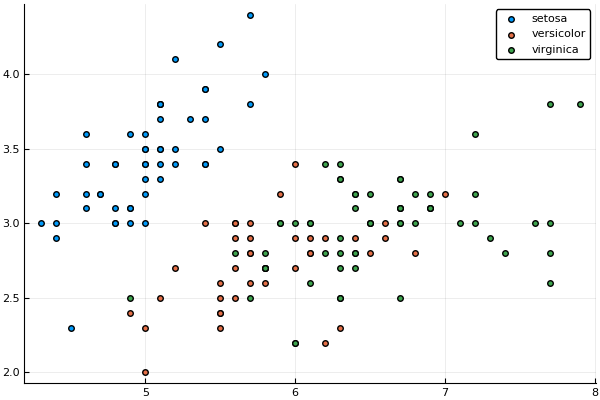

In [9]:
using Plots
using StatPlots
pyplot()
scatter(iris[:SepalLength],iris[:SepalWidth],group=iris[:Species])

We can make the plot more beautiful by adding a few custom settings. For example:
* Give it a title
* Provide xlabel and ylabel
* Change the transparency, shape, and size of the dots
* change background color to dark grey

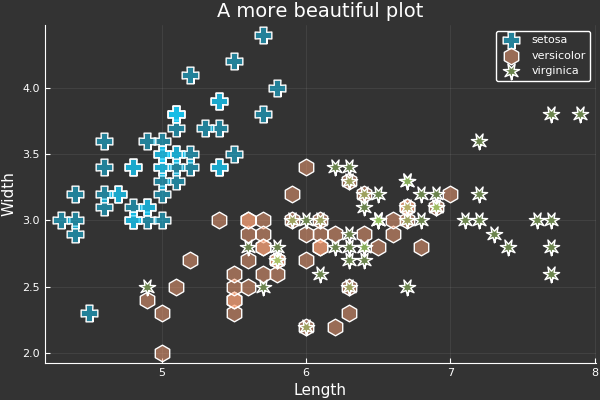

In [10]:
scatter(iris[:SepalLength],iris[:SepalWidth],group=iris[:Species],
        title = "A more beautiful plot",
        xlabel = "Length", ylabel = "Width",
        m=(0.5, [:cross :hex :star7], 12),
        bg=RGB(.2,.2,.2))

You can also do a box plot (with the cool violin plot in the back) grouped by the species. Note the `!` in `boxplot!` adds the current plot to the existing one. 

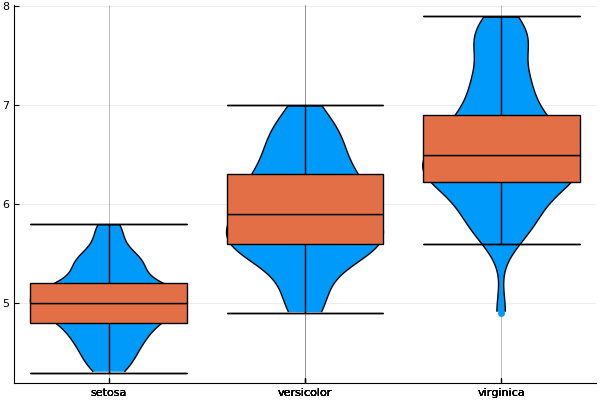

In [12]:
violin(iris[:Species],iris[:SepalLength])
boxplot!(iris[:Species],iris[:SepalLength], leg=false)

There are many other types of plots and custom options. You can explore more from [the tutorial](https://juliaplots.github.io/tutorial/).

## Exercise 2: Plotting Icecream data

This time, we are going to read in a dataset directly from the package `RDatasets`. Use the following syntax 
```dataset("Ecdat", "Icecream")```

and save it as a dataframe called `icecream`. 

The dataset is on the ice cream consumption. The columns are:
* `Cons`: consumption level of ice cream
* `Income`: income level
* `Price`: price of ice cream
* `Temperature`: outside temperature at time of measurement

Inspect the first few rows of the data.

In [14]:
using RDatasets
icecream = dataset("Ecdat", "Icecream")
head(icecream)

,Cons,Income,Price,Temp
1,0.386,78,0.27,41
2,0.374,79,0.282,56
3,0.393,81,0.277,63
4,0.425,80,0.28,68
5,0.406,76,0.272,69
6,0.344,78,0.262,65


### Task 1:
How is income related to Consumption?

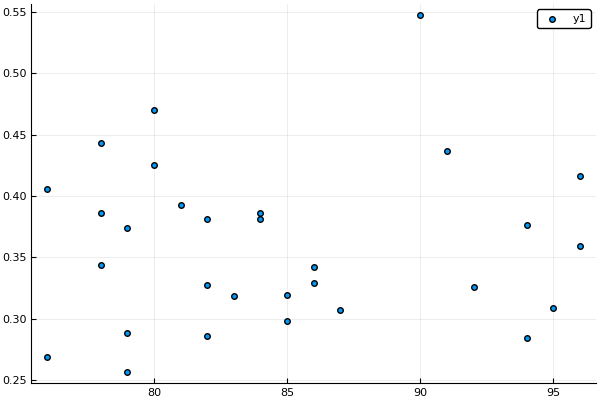

In [15]:
scatter(icecream[:Income], icecream[:Cons])

### Task 2:
Create the `Revenue` variable as the product between `Price` and `Cons`. 

Do you see a positive relationship between the temperature and revenue?

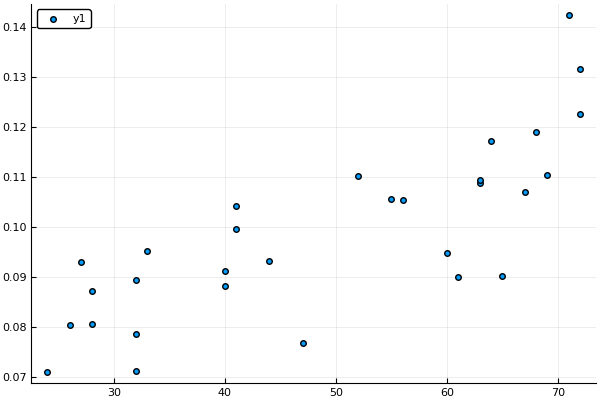

In [16]:
icecream[:Revenue] = icecream[:Price] .* icecream[:Cons]
scatter(icecream[:Temp], icecream[:Revenue])

### Task 3:
Create a new variable `IncomeGroup` that groups income based on a few buckets (your choice).

Plot the distribution of the consumption over the different groups. What do you find?

In [18]:
function get_income_group(x)
    if (x < 80) 
        gr = "low"
    elseif (x < 85)
        gr = "medium"
    else 
        gr = "high"
    end
end

icecream[:IncomeGroup] = map(get_income_group,icecream[:Income])

30-element DataArrays.DataArray{String,1}:
 "low"   
 "low"   
 "medium"
 "medium"
 "low"   
 "low"   
 "medium"
 "low"   
 "low"   
 "low"   
 "medium"
 "high"  
 "high"  
 ⋮       
 "medium"
 "high"  
 "high"  
 "high"  
 "high"  
 "high"  
 "high"  
 "high"  
 "high"  
 "high"  
 "high"  
 "high"  

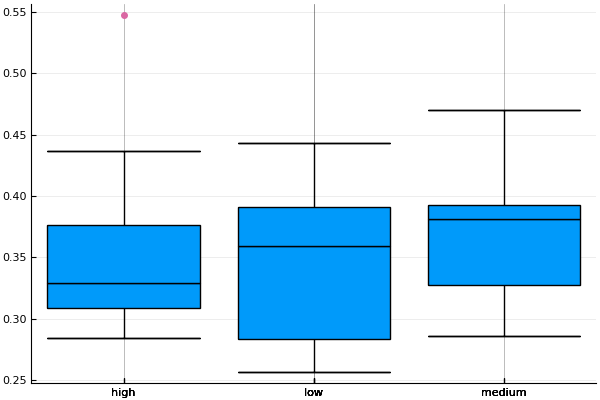

In [19]:
boxplot(icecream[:IncomeGroup], icecream[:Cons], leg=false)